In [17]:
%reset-f
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from res_ind_lib import *

from sorted_nicely import *
from replace_with_warning import *

import os, time
import warnings
warnings.filterwarnings("always",category=UserWarning)

In [19]:
import numpy as np
import pandas as pd

#Pandas display options
# pd.set_option('display.max_colwidth', 200)
# pd.set_option('display.width', 200)
# pd.set_option('display.precision', 10)
# pd.set_option('display.max_rows', 500)

import matplotlib.pylab as plt
%matplotlib inline
font = {'family' : 'serif',
    'weight' : 'normal',
    'size'   : 15}
plt.rc('font', **font)

In [25]:
economy = "country" #province, deparmtent
event_level = [economy, "hazard", "rp"]
infra_cats = ['transport','all_infra_but_transport']
sector_cats = ['transport','all_infra_but_transport','other_k']


# read 

In [26]:
macro = pd.read_csv("intermediate/macro.csv", index_col=economy).dropna()
macro.sample(n=2)

,gdp_pc_pp,pop,urbanization_rate,gdp_pc_cd,prepare_scaleup,borrow_abi,avg_prod_k,T_rebuild_K,pi,income_elast,rho,shareable,max_increased_spending,protection,tau_tax
country,,,,,,,,,,,,,,,
Comoros,1411.152339,795601.0,0.28412,775.080085,0.266667,0.166667,0.197959,3,0.2,1.5,0.06,0.8,0.05,20.0,0.027326
Uzbekistan,6038.871414,31848200.0,0.36479,2110.647872,0.000000,0.000000,0.730184,3,0.2,1.5,0.06,0.8,0.05,20.0,0.243779


In [27]:
cat_info = pd.read_csv("intermediate/cat_info.csv",  index_col=[economy, "income_cat"]).dropna()
cat_info.sample(n=2)

,,n,c,axfin,gamma_SP,k,fa,v,shew
country,income_cat,,,,,,,,
Ghana,nonpoor,0.8,4714.549395,0.232120,1.012340,11907.137871,0.004836,0.697399,0.64
Niger,poor,0.2,355.994564,0.017846,0.376445,1528.101648,0.021139,0.700000,0.48


In [28]:
infra_stocks = pd.read_csv("intermediate/infra_stocks_in.csv", index_col=[economy,"sector"]).dropna()
infra_stocks.sample(n=2)

,,share,v,fa
country,sector,,,
Solomon Islands,other_k,0.596668,0.390280,0.195265
Jamaica,transport,0.044061,0.407671,0.140410


In [29]:
hazard_ratios = pd.read_csv("intermediate/hazard_ratios.csv", index_col=event_level+["income_cat"]).dropna()
hazard_ratios.shew.describe()

count    10388.000000
mean         0.441779
std          0.366293
min          0.000000
25%          0.000000
50%          0.600000
75%          0.800000
max          1.000000
Name: shew, dtype: float64

# Computes and saves national resilience

In [30]:
groups =  pd.read_csv("inputs/income_groups.csv",header =4,index_col=2)

country_per_gp = groups["Income group"].reset_index().dropna().set_index("Income group").squeeze()
country_per_rg = groups["Region"].reset_index().dropna().set_index("Region").squeeze()
country_per_rg;


In [31]:
# args = dict(hazard_ratios = None)
args = dict(return_stats=True,hazard_ratios = hazard_ratios)
# args = dict(hazard_ratios = hazard_ratios.swaplevel("country","hazard").ix["earthquake"])
#args = dict()

#Computes
results, iah=compute_resilience(macro,cat_info,infra_stocks,return_iah=True,verbose_replace=True,**args)

#Saves
results.to_csv("results/results.csv",float_format="%.5f")

#Quick statistics
print("nb countries with macro data :" +str(macro.shape[0]))
print("nb countries with cat data :"   +str(cat_info.unstack().dropna().shape[0]))
print("nb countries with hazard data :"+str(hazard_ratios.unstack(["rp","hazard", "income_cat"]).dropna().shape[0]))

nb_countries_all_results = results["resilience"].dropna().shape[0]
print("nb countries with results :"+str(nb_countries_all_results))

Replaced in macro: 
Replaced in cats: fa, shew
Replaced in both: 
stats are axfin,c,dc,dc_npv_post,dc_npv_pre,dk,dw,fa,gamma_SP,help_fee,help_received,k,n,shew,social,v,v_shew
nb countries with macro data :146
nb countries with cat data :145
nb countries with hazard data :134
nb countries with results :9


In [32]:
results[["risk","resilience","risk_to_assets","shew","dKtot",""]]

,risk,resilience,risk_to_assets,shew,dKtot
country,,,,,
Belize,0.025007,0.314647,0.007868,0.0,2.261179e+07
Fiji,0.025186,0.537610,0.013540,3.0,1.078543e+08
Haiti,0.128238,0.193885,0.024863,2.4,4.460760e+08
Jamaica,0.017166,0.512646,0.008800,3.2,2.076684e+08
Kiribati,0.000038,0.555560,0.000021,0.0,4.556071e+03
Papua New Guinea,0.007543,0.521837,0.003936,2.4,8.341291e+07
Solomon Islands,0.040748,0.496118,0.020216,1.8,2.511649e+07
St. Lucia,0.020989,0.407170,0.008546,1.8,1.628331e+07
Tonga,0.033903,0.619407,0.021000,1.8,1.199548e+07


In [33]:
hazard_ratios

fa  shew
country  hazard     rp     income_cat                
Albania  earthquake 20.0   nonpoor     0.007294   0.0
                           poor        0.007294   0.0
                    50.0   nonpoor     0.015454   0.0
                           poor        0.015454   0.0
                    100.0  nonpoor     0.026673   0.0
                           poor        0.026673   0.0
                    250.0  nonpoor     0.052863   0.0
                           poor        0.052863   0.0
                    500.0  nonpoor     0.084578   0.0
                           poor        0.084578   0.0
                    1000.0 nonpoor     0.128833   0.0
                           poor        0.128833   0.0
                    1500.0 nonpoor     0.161317   0.0
                           poor        0.161317   0.0
         flood      20.0   nonpoor     0.013625   0.0
                           poor        0.012439   0.0
                    50.0   nonpoor     0.030463   0.0
                           poor        0.027813   0.0
                    100.0  nonpoor     0.036806   0.0
                           poor        0.033603   0.0
                    250.0  nonpoor     0.064867   0.0
                           poor        0.059223   0.0
                    500.0  nonpoor     0.075788   0.0
                           poor        0.069194   0.0
                    1000.0 nonpoor     0.088330   0.0
                           poor        0.080645   0.0
                    1500.0 nonpoor     0.094378   0.0
                           poor        0.086167   0.0
         surge      20.0   nonpoor     0.000000   0.0
                           poor        0.000000   0.0
...                                         ...   ...
Zimbabwe surge      1500.0 nonpoor     0.000000   0.8
                           poor        0.000000   0.8
         tsunami    20.0   nonpoor     0.000000   0.8
                           poor        0.000000   0.8
                    50.0   nonpoor     0.000000   0.8
                           poor        0.000000   0.8
                    100.0  nonpoor     0.000000   0.8
                           poor        0.000000   0.8
                    250.0  nonpoor     0.000000   0.8
                           poor        0.000000   0.8
                    500.0  nonpoor     0.000000   0.8
                           poor        0.000000   0.8
                    1000.0 nonpoor     0.000000   0.8
                           poor        0.000000   0.8
                    1500.0 nonpoor     0.000000   0.8
                           poor        0.000000   0.8
         wind       20.0   nonpoor     0.000000   0.8
                           poor        0.000000   0.8
                    50.0   nonpoor     0.000000   0.8
                           poor        0.000000   0.8
                    100.0  nonpoor     0.000000   0.8
                           poor        0.000000   0.8
                    250.0  nonpoor     0.000000   0.8
                           poor        0.000000   0.8
                    500.0  nonpoor     0.000000   0.8
                           poor        0.000000   0.8
                    1000.0 nonpoor     0.000000   0.8
                           poor        0.000000   0.8
                    1500.0 nonpoor     0.000000   0.8
                           poor        0.000000   0.8

[10388 rows x 2 columns]

In [11]:

def print_stats(results, region_name="global"):

    #Some stats
    a=results.resilience;
    print("Resilience averages {mean:.0%} across our sample, ranging from {min:.0%} ({m}) to {max:.0%} ({M})".format(
            min=a.min(),mean=a.mean(),max=a.max(), m=a.argmin(),M=a.argmax()))

    a=results.risk
    print("Risk to welfare averages {mean:.2%} across our sample, ranging from {min:.03%} ({m}) to {max:.1%} ({M})".format(
        min=a.min(),mean=a.mean(),max=a.max(),m=a.argmin(),M=a.argmax()))

    a=results.risk_to_assets
    print("Risk to assets averages {mean:.2%} across our sample, ranging from {min:.03%} ({m}) to {max:.1%} ({M})".format(
        min=a.min(),mean=a.mean(),max=a.max(),m=a.argmin(),M=a.argmax()))


    print("At the {region_name} scale, we estimate asset losses due to natural disasters to be {k:.0f} bn$ per year. "\
          "But due to lack of socio economic capacity, welfare losses are {r:.1f} times larger, at {w:.0f} bn$ per year".format( 
    w= results.dWtot_currency.sum()*1e-9,
    k= results.dKtot.sum()*1e-9,
    region_name = region_name,
    r=results.dWtot_currency.sum()/results.dKtot.sum()))

    
print_stats(results)    

for g in country_per_gp.index.unique():
    print("\n=======\n"+g)
    print_stats(results.ix[country_per_gp.ix[g]],g)

for r in country_per_rg.index.unique():
    if results.ix[country_per_rg.ix[r]] 
    print("\n=======\n"+r)
    print_stats(results.ix[country_per_rg.ix[r]],r)
    

#eca_clients = groups[(~ groups["Income group"].isin(["High income: nonOECD", "High income: OECD"])) 
                        # & (groups["Region"]=="Europe & Central Asia")].index
#print("\n=======\n"+"ECA")    
#print_stats(results.ix[eca_clients],"ECA CLIENTS")    
   

Replaced in macro: 
Replaced in cats: fa, shew
Replaced in both: 
stats are axfin,c,dc,dc_npv_post,dc_npv_pre,dk,dw,fa,gamma_SP,help_fee,help_received,k,n,shew,social,v,v_shew
nb countries with macro data :146
nb countries with cat data :145
nb countries with hazard data :12
nb countries with results :9
Resilience averages 38% across our sample, ranging from 13% (Haiti) to 60% (Tonga)
Risk to welfare averages 13.61% across our sample, ranging from 0.011% (Kiribati) to 59.4% (Haiti)
Risk to assets averages 3.63% across our sample, ranging from 0.006% (Kiribati) to 7.5% (Haiti)
At the global scale, we estimate asset losses due to natural disasters to be 3 bn$ per year. But due to lack of socio economic capacity, welfare losses are 5.3 times larger, at 15 bn$ per year

Low income
Resilience averages 13% across our sample, ranging from 13% (Haiti) to 13% (Haiti)
Risk to welfare averages 59.40% across our sample, ranging from 59.397% (Haiti) to 59.4% (Haiti)
Risk to assets averages 7.46% ac

ZeroDivisionError: float division by zero

In [40]:
[c for c in macro.dropna().index if c not in results.dropna().index]

['Finland']

results.query(".45<resilience<.55").resilience

In [41]:
results.query("risk_to_assets>.02").risk_to_assets

country
Bangladesh     0.022718
El Salvador    0.026985
Honduras       0.027864
Lao PDR        0.035268
Madagascar     0.035413
Peru           0.020987
Philippines    0.045164
Name: risk_to_assets, dtype: float64

# compare with GAR

In [42]:
from fancy_plots import savefig
from os import makedirs

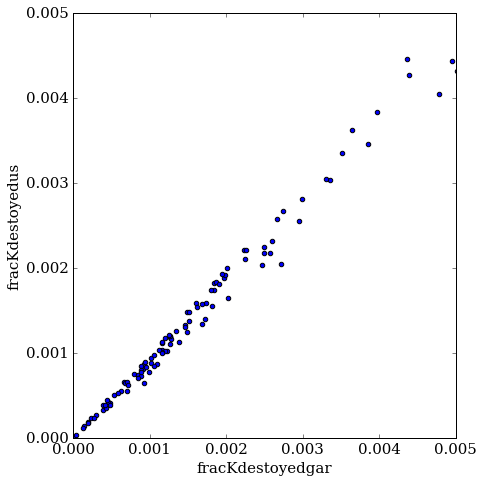

In [43]:
results["fracKdestoyedus"] =  results.dKtot/(results.gdp_pc_pp*results["pop"]/results.avg_prod_k)

results["fracKdestoyedgar"] =average_over_rp(pd.read_csv("intermediate/frac_value_destroyed_gar.csv").set_index(["country","hazard","rp"])).sum(level="country").squeeze()

results.plot.scatter(x="fracKdestoyedgar", y="fracKdestoyedus", figsize=(7,7))
plt.xlim(0,0.005)
plt.ylim(0,0.005)
makedirs("img",exist_ok=True)
savefig("img/gar_dkk_vs_us_dkk")

# export table

In [21]:
a=results.copy()

a["v"] = pd.read_csv("inputs/v_pr_fromPAGER_shaved_GAR.csv", index_col="country").v


to_output = ['gdp_pc_pp', 'pop',"v","fa","resilience","risk","risk_to_assets"]
a=a[to_output]

a["pop"] = a["pop"]/1e6

a["fa_in_gdp"] =  results["fa"]/ results["avg_prod_k"]

a.to_csv("intermediate/main_results.csv")


a.loc[:,["fa","fa_in_gdp","v","resilience","risk", "risk_to_assets"]]=100*a[["fa","fa_in_gdp","v","resilience","risk","risk_to_assets"]]
desc=pd.read_csv("inputs/inputs_info.csv").set_index('key')["descriptor"]
a=a.rename(columns=desc).dropna()
a.to_excel("intermediate/results.xlsx")
a.head()


,GDP per capita,Population,Vulnerability,Exposure (percent of the population),Resilience,Risk to welfare,Risk to assets,Exposure (percent of GDP)
country,,,,,,,,
Albania,9960.940726,2.897366,38.234225,0.481400,69.007030,1.431156,0.987598,2.598232
Angola,7488.011760,21.471618,60.540000,0.154274,31.208563,0.477733,0.149094,0.356786
Argentina,18087.196262,41.446246,41.111968,0.308703,56.729170,0.775769,0.440087,1.145254
Armenia,7526.836419,2.976566,24.298125,1.131023,70.691501,1.029256,0.727596,3.084364
Australia,42834.016760,23.129300,54.994642,0.129016,72.296851,0.280609,0.202872,0.471544


## export table for Brad's appendix of results

In [22]:
from fancy_round import fancy_round

In [23]:
export = pd.DataFrame()

In [24]:
# a["label_asset"]= "Risk to assets "+
export["Assets"]=(a["Risk to assets"]/100*a["GDP per capita"]*a["Population"]).map(lambda x:"Risk to assets: ${:,} million ".format(fancy_round(x)))+(a["Risk to assets"]).map(lambda x:"({:,}% of GDP)".format(fancy_round(x)))
export["Resilience"] = a["Resilience"].map(lambda x:"Socio-economic Resilience: {:,}%".format(fancy_round(x)))
export["Well-being"]=(a["Risk to welfare"]/100*a["GDP per capita"]*a["Population"]).map(lambda x:"Risk to well-being: ${:,} million ".format(fancy_round(x)))+(a["Risk to welfare"]).map(lambda x:"({:,}% of GDP)".format(fancy_round(x)))
export.to_csv("results/export_table_asset_resi_wellfare_labels_for_brad.csv")
export.sample(5)

,Assets,Resilience,Well-being
country,,,
Indonesia,"Risk to assets: $7,700 million (0.33% of GDP)",Socio-economic Resilience: 69%,"Risk to well-being: $11,000 million (0.49% of ..."
"Egypt, Arab Rep.",Risk to assets: $750 million (0.09% of GDP),Socio-economic Resilience: 58%,"Risk to well-being: $1,300 million (0.15% of GDP)"
Kazakhstan,"Risk to assets: $1,000 million (0.27% of GDP)",Socio-economic Resilience: 62%,"Risk to well-being: $1,600 million (0.43% of GDP)"
Philippines,"Risk to assets: $28,000 million (4.5% of GDP)",Socio-economic Resilience: 69%,"Risk to well-being: $41,000 million (6.5% of GDP)"
Moldova,Risk to assets: $150 million (0.9% of GDP),Socio-economic Resilience: 75%,Risk to well-being: $190 million (1.2% of GDP)


# report countries per region and lending group

In [25]:
wb_countries = pd.read_csv("inputs/iso3_to_wb_name.csv")

In [26]:

groups = pd.read_csv("inputs/income_groups.csv",header =4,index_col=2).replace({"ROM":"ROU","ZAR":"COD"})  #they used old iso3 country for Zair (Congo) and Romania
groups= groups[["Code","Region","Income group","Lending category","Other"]]
groups.dropna(axis=0,how="all",inplace=True);
groups.rename(columns={"Other":"HIPC"},inplace=True)
groups['HIPC'].fillna('',inplace=True)
groups["Lending category"].replace("..","",inplace=True)

groups =groups.ix[wb_countries.country.values]


#counts IDA and non-IDA countries for which we have the data
groups.ix[results.dropna().index][["Lending category"]].to_excel("lending_categories.xlsx")
print("our sample\n", groups.ix[results.dropna().index]["Lending category"].value_counts())

print("\ntotal\n", groups["Lending category"].value_counts())

#Build excel file reporting countries for which we have or have not data
groups["has all data"]=0
groups["has all data"]=(np.sign(results.risk))
groups["has all data"].fillna(0,inplace=True)

#Bigger report including missing data
# groups["missing_data"]=report["missing_data"]
# groups["missing_data"].fillna("",inplace=True)
groups.head()


print("\nFraction of COUNTRIES covered\n")
print(groups.groupby("Lending category")["has all data"].mean())
print(" ")
print(groups.groupby("Region")["has all data"].mean())
print(" ")
print(groups.groupby("Income group")["has all data"].mean())
print("global")
print((groups[["has all data"]].mean()))



#population
groups["pop"]=pd.read_csv("inputs/wb_data.csv",index_col="country")["pop"]
print("\n===========\nFraction of POPULATION covered\n")
print(groups.groupby("Lending category")[["has all data","pop"]].apply(lambda s: s.prod(axis=1)/s["pop"].sum()).sum(level=0))
print(" ")
print(groups.groupby("Region")[["has all data","pop"]].apply(lambda s: s.prod(axis=1)/s["pop"].sum()).sum(level=0))
print(" ")
print(groups.groupby("Income group")[["has all data","pop"]].apply(lambda s: s.prod(axis=1)/s["pop"].sum()).sum(level=0))
print("global")
print((groups[["has all data","pop"]].prod(axis=1)/groups["pop"].sum()).sum())


#global



groups.to_excel("have_and_have_nots.xlsx", encoding="utf-8")
groups.to_csv("have_and_have_nots.csv", encoding="utf-8")

our sample
 IBRD     50
IDA      33
         24
Blend    10
Name: Lending category, dtype: int64

total
          68
IBRD     67
IDA      56
Blend    17
Name: Lending category, dtype: int64

Fraction of COUNTRIES covered

Lending category
         0.352941
Blend    0.588235
IBRD     0.746269
IDA      0.589286
Name: has all data, dtype: float64
 
Region
East Asia & Pacific           0.305556
Europe & Central Asia         0.727273
Latin America & Caribbean     0.450000
Middle East & North Africa    0.428571
North America                 0.666667
South Asia                    0.625000
Sub-Saharan Africa            0.711111
Name: has all data, dtype: float64
 
Income group
High income: OECD       0.750000
High income: nonOECD    0.155556
Low income              0.612903
Lower middle income     0.744681
Upper middle income     0.603774
Name: has all data, dtype: float64
global
has all data    0.536697
dtype: float64

Fraction of POPULATION covered



TypeError: Series.name must be a hashable type

In [27]:
groups.query("Region=='North America'")

,Code,Region,Income group,Lending category,HIPC,has all data,pop
Economy,,,,,,,
Bermuda,BMU,North America,High income: nonOECD,,,0.0,65235.0
Canada,CAN,North America,High income: OECD,,,1.0,35851774.0
United States,USA,North America,High income: OECD,,,1.0,321418820.0


In [28]:
groups.ix["Mexico"]

Code                                      MEX
Region              Latin America & Caribbean
Income group              Upper middle income
Lending category                         IBRD
HIPC                                         
has all data                                1
pop                               1.27017e+08
Name: Mexico, dtype: object

In [ ]:
(100*results.dK/results.k).replace(0,np.nan).dropna().sort_values().plot.bar(figsize=(20,6))
plt.ylabel("E[dk]/k (%)")

In [ ]:
reldk_agv = average_over_rp(pd.read_csv("intermediate/frac_value_destroyed_gar.csv", index_col=[0,1,2]))
reldk_agv.columns=["gar"]

reldk_agv =reldk_agv.swaplevel(0,1).sort_index().assign(model=np.nan)

reldk_agv.head()

for h in hazard_ratios.reset_index("hazard").hazard.unique():
#     args = dict(hazard_ratios = hazard_ratios)
    args = dict(hazard_ratios = hazard_ratios.swaplevel("country","hazard").ix[h])

    results =compute_resilience(macro,cat_info,**args)
    reldk_agv["model"].update(pd.concat([results.dK/cat_info[["k","n"]].prod(axis=1, skipna=False).sum(level="country")], keys=[h]))

    

In [ ]:

for out in  ["resilience", "risk_to_assets"]:
    a = compute_resilience(macro,cat_info,)[out]
    b= compute_resilience(macro,cat_info, hazard_ratios=hazard_ratios)[out]
    c= compute_resilience(macro,cat_info, hazard_ratios=hazard_ratios.unstack("hazard").swaplevel(0,1,axis=1)["flood"])[out]
    d= compute_resilience(macro,cat_info, hazard_ratios=hazard_ratios.unstack("rp").swaplevel(0,1,axis=1)[20])[out]

    plt.figure(figsize=(6,6))
    plt.scatter(x=a,y=b,  s=50,clip_on=False, c="blue",alpha=0.5, )
    plt.scatter(x=a,y=c, alpha=0.5, s=50,clip_on=False, color="green")
    plt.scatter(x=a,y=d, alpha=0.5, s=50,clip_on=False, c="red")

    plt.legend(["All hazard data", "Only river", "only rp=20"], loc="best")
    plt.xlabel("no hazard")
    plt.ylabel("")
    plt.xlim(0,)
    plt.ylim(0,)


